<a href="https://colab.research.google.com/github/VietAnh954/Plant-Status-Classification-based-on-Leaf-Color-Features-and-Sensor-Data-ML-/blob/main/1_Load_PlantVillageData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bước 1: Chuẩn bị môi trường & Mount Drive

In [2]:
# [Cell 1]
from google.colab import drive
import os

# 1. Mount Google Drive
# Code này sẽ yêu cầu bạn cấp quyền truy cập Drive
print("🔄 Đang kết nối với Google Drive...")
drive.mount('/content/drive')

# 2. Tạo đường dẫn thư mục lưu trữ vĩnh viễn
# Chúng ta sẽ tạo một thư mục riêng tên là 'SmartPlant_Project' để gọn gàng
base_dir = '/content/drive/MyDrive/Colab Notebooks/ML/NEW PLAN/dataPlantVillage'
raw_data_dir = os.path.join(base_dir, 'Raw_Data_PlantVillage')

if not os.path.exists(raw_data_dir):
    os.makedirs(raw_data_dir)
    print(f"✅ Đã tạo thư mục mới tại: {raw_data_dir}")
else:
    print(f"ℹ️ Thư mục lưu trữ đã tồn tại tại: {raw_data_dir}")

🔄 Đang kết nối với Google Drive...
Mounted at /content/drive
ℹ️ Thư mục lưu trữ đã tồn tại tại: /content/drive/MyDrive/Colab Notebooks/ML/NEW PLAN/dataPlantVillage/Raw_Data_PlantVillage


# Bước 2: Tải dữ liệu và Lưu vào Drive

In [3]:
# [Cell 2]
import kagglehub
import shutil

# Kiểm tra xem trong Drive đã có dữ liệu chưa để tránh tải lại tốn thời gian
if len(os.listdir(raw_data_dir)) > 0:
    print("🛑 Dữ liệu đã có sẵn trong Google Drive. Bỏ qua bước tải lại.")
    print(f"📂 Kiểm tra tại: {raw_data_dir}")
else:
    print("⬇️ Đang tải dataset từ Kaggle về bộ nhớ tạm (Cache)...")
    # Tải về cache của Colab
    path_cache = kagglehub.dataset_download("emmarex/plantdisease")
    print(f"✅ Đã tải xong về Cache tại: {path_cache}")

    print("🚚 Đang chuyển dữ liệu từ Cache sang Google Drive (Sẽ mất vài phút)...")
    # Copy toàn bộ nội dung từ thư mục cache sang thư mục Drive
    # shutil.copytree cần thư mục đích chưa tồn tại hoặc rỗng,
    # nên ta dùng logic copy_tree của distutils hoặc loop copy để an toàn hơn
    # Ở đây tôi dùng cách đơn giản nhất: copy nội dung bên trong

    # Lấy tên các folder con (VD: PlantVillage)
    items = os.listdir(path_cache)
    for item in items:
        s = os.path.join(path_cache, item)
        d = os.path.join(raw_data_dir, item)
        if os.path.isdir(s):
            # Nếu đích chưa có thì copy
            if not os.path.exists(d):
                shutil.copytree(s, d)
        else:
            shutil.copy2(s, d)

    print(f"🎉 HOÀN TẤT! Dữ liệu đã được lưu vĩnh viễn tại: {raw_data_dir}")

🛑 Dữ liệu đã có sẵn trong Google Drive. Bỏ qua bước tải lại.
📂 Kiểm tra tại: /content/drive/MyDrive/Colab Notebooks/ML/NEW PLAN/dataPlantVillage/Raw_Data_PlantVillage


# Bước 3: Kiểm tra , soi dữ liệu

In [4]:
# [Cell 3]
print("🔍 KIỂM TRA CẤU TRÚC DỮ LIỆU ĐÃ LƯU:")

# Đếm số lượng folder con (Tương ứng số lượng nhãn bệnh/cây)
subfolders = [f.path for f in os.scandir(raw_data_dir) if f.is_dir()]

# Vì bộ dữ liệu này thường có 1 folder mẹ là 'PlantVillage' lồng bên trong
# Ta cần tìm đúng chỗ chứa ảnh
target_folder = raw_data_dir
# Kiểm tra nếu chỉ có 1 folder con tên PlantVillage thì đi sâu vào 1 cấp
if len(subfolders) == 1 and 'PlantVillage' in subfolders[0]:
    target_folder = subfolders[0]
    subfolders = [f.path for f in os.scandir(target_folder) if f.is_dir()]

print(f"📍 Thư mục gốc chứa ảnh: {target_folder}")
print(f"📊 Tổng số lớp (Classes): {len(subfolders)}")

# Liệt kê 5 lớp đầu tiên và số lượng ảnh trong đó
print("\n--- Thống kê nhanh 5 lớp đầu tiên ---")
for folder in subfolders[:5]:
    folder_name = os.path.basename(folder)
    num_images = len(os.listdir(folder))
    print(f"📁 {folder_name}: {num_images} ảnh")

🔍 KIỂM TRA CẤU TRÚC DỮ LIỆU ĐÃ LƯU:
📍 Thư mục gốc chứa ảnh: /content/drive/MyDrive/Colab Notebooks/ML/NEW PLAN/dataPlantVillage/Raw_Data_PlantVillage/PlantVillage
📊 Tổng số lớp (Classes): 15

--- Thống kê nhanh 5 lớp đầu tiên ---
📁 Pepper__bell___healthy: 1478 ảnh
📁 Potato___healthy: 152 ảnh
📁 Potato___Early_blight: 1000 ảnh
📁 Potato___Late_blight: 1000 ảnh
📁 Tomato_Bacterial_spot: 2127 ảnh


# Bước 4: Trực quan hóa dữ liệu (Visualization)

📊 Đang phân tích dữ liệu tại: /content/drive/MyDrive/Colab Notebooks/ML/NEW PLAN/dataPlantVillage/Raw_Data_PlantVillage/PlantVillage


/tmp/ipython-input-4260539198.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values, y=names, palette="viridis")



📸 ẢNH MẪU ĐẠI DIỆN TỪNG LỚP:


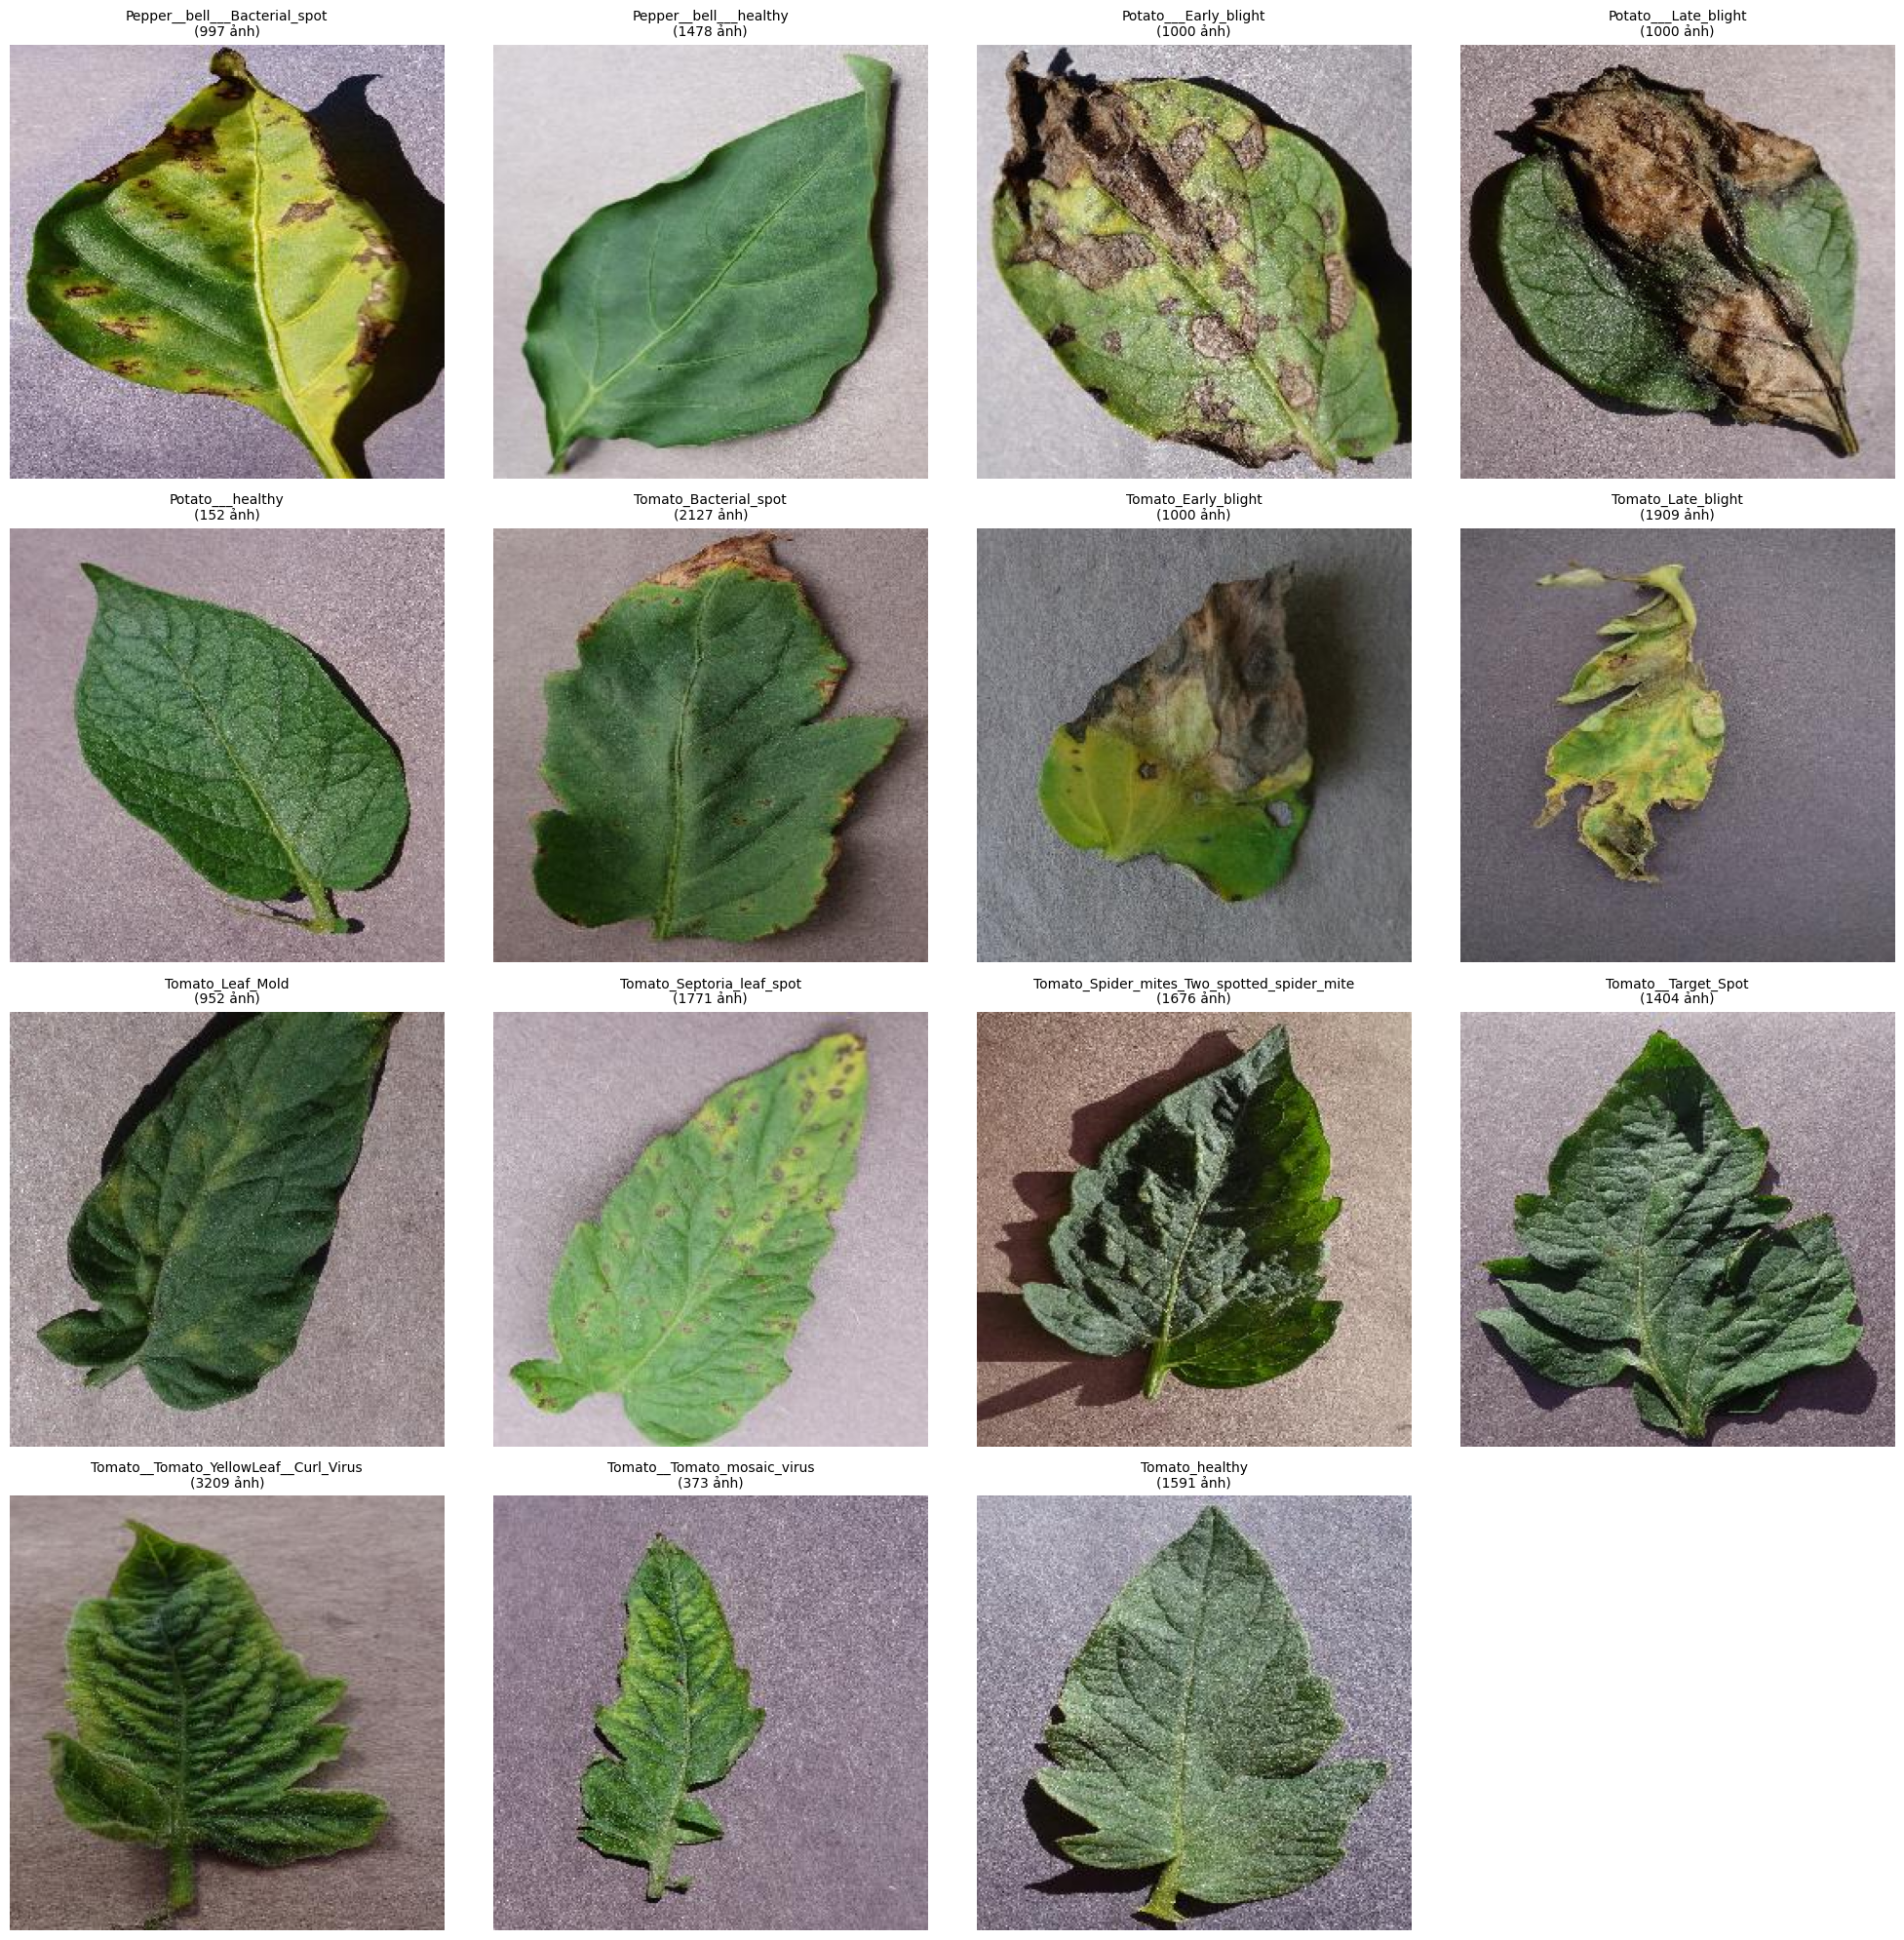

In [5]:
# [Cell 4] - TRỰC QUAN HÓA DỮ LIỆU
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import glob
import math

# 1. Cấu hình đường dẫn (Lấy từ log của bạn)
# Lưu ý: Python xử lý đường dẫn có khoảng trắng cần cẩn thận, code dưới đã xử lý
dataset_path = "/content/drive/MyDrive/Colab Notebooks/ML/NEW PLAN/dataPlantVillage/Raw_Data_PlantVillage/PlantVillage"

print(f"📊 Đang phân tích dữ liệu tại: {dataset_path}")

# 2. Lấy danh sách folder và đếm số lượng
classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
classes.sort() # Sắp xếp tên cho đẹp

class_counts = {}
sample_images = {}

for class_name in classes:
    folder_path = os.path.join(dataset_path, class_name)
    # Lấy tất cả file ảnh (jpg, png, jpeg...)
    images = glob.glob(os.path.join(folder_path, "*"))

    # Lưu số lượng
    count = len(images)
    class_counts[class_name] = count

    # Lưu 1 ảnh mẫu đầu tiên tìm thấy để hiển thị
    if count > 0:
        sample_images[class_name] = images[0]

# --- VẼ BIỂU ĐỒ 1: PHÂN BỐ SỐ LƯỢNG ---
plt.figure(figsize=(15, 8))
# Chuyển dữ liệu sang list để vẽ
names = list(class_counts.keys())
values = list(class_counts.values())

# Vẽ Barplot với màu gradient cho đẹp
sns.barplot(x=values, y=names, palette="viridis")

plt.title('Phân bố số lượng ảnh trong từng lớp (Class Distribution)', fontsize=15, fontweight='bold')
plt.xlabel('Số lượng ảnh', fontsize=12)
plt.ylabel('Tên lớp bệnh/Cây', fontsize=12)

# Hiển thị con số cụ thể trên từng cột
for i, v in enumerate(values):
    plt.text(v + 10, i + 0.25, str(v), color='black', fontweight='bold')

plt.tight_layout()
plt.show()

# --- VẼ BIỂU ĐỒ 2: XEM ẢNH MẪU (GROUND TRUTH) ---
print("\n📸 ẢNH MẪU ĐẠI DIỆN TỪNG LỚP:")
num_classes = len(classes)
cols = 4 # Số cột muốn hiển thị
rows = math.ceil(num_classes / cols)

plt.figure(figsize=(20, 5 * rows))

for i, class_name in enumerate(classes):
    if class_name in sample_images:
        img_path = sample_images[class_name]

        # Đọc ảnh bằng OpenCV (mặc định là BGR nên phải chuyển sang RGB)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.title(f"{class_name}\n({class_counts[class_name]} ảnh)", fontsize=10)
        plt.axis('off')

plt.tight_layout()
plt.show()

## Phân loại ảnh Healthy và Diseased

### Subtask:
Dựa trên tên lớp, phân loại các thư mục ảnh hiện có thành hai nhóm chính: 'Healthy' (khỏe mạnh) và 'Diseased' (bị bệnh). Tính tổng số ảnh cho mỗi nhóm.


In [7]:
import re

# Khởi tạo biến đếm
healthy_count = 0
diseased_count = 0

print("--- Phân loại ảnh Healthy và Diseased ---")

# Lặp qua từng lớp và phân loại
for class_name, count in class_counts.items():
    if "healthy" in class_name.lower():
        healthy_count += count
        print(f"[Healthy] {class_name}: {count} ảnh")
    else:
        diseased_count += count
        print(f"[Diseased] {class_name}: {count} ảnh")

print("\n--- Tổng kết ---")
print(f"Tổng số ảnh Healthy: {healthy_count}")
print(f"Tổng số ảnh Diseased: {diseased_count}")


--- Phân loại ảnh Healthy và Diseased ---
[Diseased] Pepper__bell___Bacterial_spot: 997 ảnh
[Healthy] Pepper__bell___healthy: 1478 ảnh
[Diseased] Potato___Early_blight: 1000 ảnh
[Diseased] Potato___Late_blight: 1000 ảnh
[Healthy] Potato___healthy: 152 ảnh
[Diseased] Tomato_Bacterial_spot: 2127 ảnh
[Diseased] Tomato_Early_blight: 1000 ảnh
[Diseased] Tomato_Late_blight: 1909 ảnh
[Diseased] Tomato_Leaf_Mold: 952 ảnh
[Diseased] Tomato_Septoria_leaf_spot: 1771 ảnh
[Diseased] Tomato_Spider_mites_Two_spotted_spider_mite: 1676 ảnh
[Diseased] Tomato__Target_Spot: 1404 ảnh
[Diseased] Tomato__Tomato_YellowLeaf__Curl_Virus: 3209 ảnh
[Diseased] Tomato__Tomato_mosaic_virus: 373 ảnh
[Healthy] Tomato_healthy: 1591 ảnh

--- Tổng kết ---
Tổng số ảnh Healthy: 3221
Tổng số ảnh Diseased: 17418


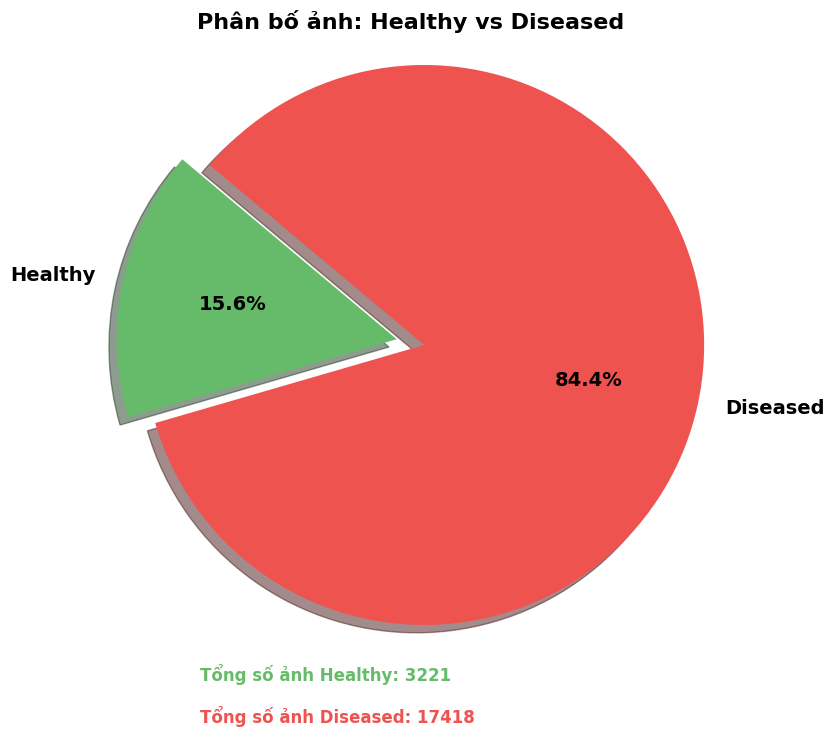

In [8]:
import matplotlib.pyplot as plt

# Data for plotting
labels = ['Healthy', 'Diseased']
sizes = [healthy_count, diseased_count]
colors = ['#66bb6a', '#ef5350'] # Green for healthy, Red for diseased
explode = (0.1, 0)  # Explode the 'Diseased' slice a little

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140, textprops={'fontsize': 14, 'color': 'black', 'fontweight': 'bold'})
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Phân bố ảnh: Healthy vs Diseased', fontsize=16, fontweight='bold')

# Thêm chú thích tổng số ảnh
plt.text(-0.8, -1.2, f'Tổng số ảnh Healthy: {healthy_count}', fontsize=12, color='#66bb6a', fontweight='bold')
plt.text(-0.8, -1.35, f'Tổng số ảnh Diseased: {diseased_count}', fontsize=12, color='#ef5350', fontweight='bold')

plt.show()


### Tóm tắt so sánh ảnh Healthy và Diseased

Từ quá trình phân loại và trực quan hóa dữ liệu, chúng ta có thể rút ra những nhận xét sau:

*   **Tổng số ảnh khỏe mạnh (Healthy):** `3221`
*   **Tổng số ảnh bị bệnh (Diseased):** `17418`

**Phân tích:**

Dữ liệu cho thấy có sự mất cân bằng đáng kể giữa số lượng ảnh cây khỏe mạnh và cây bị bệnh. Cụ thể, số lượng ảnh cây bị bệnh (`17418`) nhiều hơn gấp khoảng **5.4 lần** so với số lượng ảnh cây khỏe mạnh (`3221`).

**Ý nghĩa:**

Sự mất cân bằng này là một yếu tố quan trọng cần lưu ý khi xây dựng mô hình học máy:

*   **Ưu điểm:** Mô hình sẽ có nhiều dữ liệu để học các đặc điểm của các loại bệnh khác nhau, có thể dẫn đến khả năng nhận diện bệnh tốt hơn.
*   **Thách thức:** Do số lượng ảnh healthy ít hơn nhiều, mô hình có thể gặp khó khăn trong việc phân biệt chính xác cây khỏe mạnh với các bệnh lý, hoặc có thể đánh giá sai nếu không được xử lý cẩn thận (ví dụ: mô hình có thể có xu hướng phân loại một ảnh là 'diseased' hơn là 'healthy' do tần suất xuất hiện cao hơn của ảnh bệnh).

Để giải quyết vấn đề mất cân bằng dữ liệu (data imbalance), các kỹ thuật như *oversampling* (tăng cường ảnh healthy), *undersampling* (giảm bớt ảnh diseased), sử dụng các hàm mất mát (loss function) chuyên biệt, hoặc các phương pháp *data augmentation* có chọn lọc có thể được áp dụng trong quá trình huấn luyện mô hình.

# FULL STEP D

## Tóm tắt chi tiết các bước đã thực hiện trong Notebook

Chúng ta đã thực hiện một quy trình phân tích và trực quan hóa dữ liệu ảnh cây trồng, bao gồm các bước chính sau:

### 1. Chuẩn bị môi trường & Mount Drive (Cell `ADJb2KHyACZq`)
*   **Mục tiêu:** Kết nối với Google Drive để lưu trữ dữ liệu vĩnh viễn và tạo cấu trúc thư mục dự án.
*   **Thực hiện:**
    *   Import thư viện `google.colab.drive` và `os`.
    *   Sử dụng `drive.mount('/content/drive')` để kết nối Notebook với Google Drive của bạn.
    *   Định nghĩa `base_dir` và `raw_data_dir` để tạo một thư mục chuyên biệt cho dự án: `/content/drive/MyDrive/Colab Notebooks/ML/NEW PLAN/dataPlantVillage/Raw_Data_PlantVillage`.
    *   Kiểm tra và tạo thư mục `raw_data_dir` nếu nó chưa tồn tại.
*   **Kết quả:** Google Drive đã được mount thành công và thư mục `Raw_Data_PlantVillage` đã được đảm bảo tồn tại.

### 2. Tải dữ liệu và Lưu vào Drive (Cell `2G_v4aa6B-MV`)
*   **Mục tiêu:** Tải dataset ảnh PlantVillage từ Kaggle và lưu trữ vĩnh viễn vào Google Drive.
*   **Thực hiện:**
    *   Import thư viện `kagglehub` và `shutil`.
    *   Kiểm tra nếu thư mục `raw_data_dir` đã có dữ liệu, nếu có thì bỏ qua bước tải để tiết kiệm thời gian.
    *   Nếu chưa có, sử dụng `kagglehub.dataset_download("emmarex/plantdisease")` để tải dataset vào bộ nhớ cache của Colab.
    *   Sao chép toàn bộ nội dung từ thư mục cache (`path_cache`) sang thư mục đích trên Drive (`raw_data_dir`) bằng cách lặp qua các item và sử dụng `shutil.copytree` hoặc `shutil.copy2`.
*   **Kết quả:** Dataset PlantVillage đã được tải về và lưu trữ an toàn trong Google Drive, sẵn sàng cho các bước phân tích tiếp theo.

### 3. Kiểm tra, soi dữ liệu (Cell `TpLezBzgC3TK`)
*   **Mục tiêu:** Kiểm tra cấu trúc thư mục của dữ liệu đã tải và đếm số lượng ảnh trong các lớp khác nhau.
*   **Thực hiện:**
    *   Sử dụng `os.scandir` để liệt kê các thư mục con trong `raw_data_dir`.
    *   Điều chỉnh `target_folder` để trỏ đúng vào thư mục chứa các lớp ảnh (xử lý trường hợp dataset có thêm một lớp cha 'PlantVillage').
    *   Đếm tổng số lớp (classes) và liệt kê 5 lớp đầu tiên cùng số lượng ảnh của chúng.
*   **Kết quả:** Xác định được `target_folder` là `/content/drive/MyDrive/Colab Notebooks/ML/NEW PLAN/dataPlantVillage/Raw_Data_PlantVillage/PlantVillage` với tổng cộng 15 lớp. Liệt kê số lượng ảnh của 5 lớp đầu tiên để có cái nhìn tổng quan.

### 4. Trực quan hóa dữ liệu (Cell `3mlapPiZNDGN`)
*   **Mục tiêu:** Hiểu rõ hơn về phân bố số lượng ảnh trong mỗi lớp và xem các ảnh mẫu đại diện.
*   **Thực hiện:**
    *   Import thư viện `matplotlib.pyplot`, `seaborn`, `cv2`, `os`, `glob`, `math`.
    *   Lấy danh sách các lớp và đếm số lượng ảnh cho mỗi lớp, đồng thời lưu trữ đường dẫn của một ảnh mẫu cho mỗi lớp.
    *   **Biểu đồ 1 (Barplot):** Vẽ biểu đồ cột hiển thị phân bố số lượng ảnh trong từng lớp, có thêm nhãn số lượng cụ thể trên mỗi cột.
    *   **Biểu đồ 2 (Ảnh mẫu):** Hiển thị một lưới các ảnh mẫu đại diện cho từng lớp, giúp trực quan hóa nội dung của dataset.
*   **Kết quả:** Hai biểu đồ đã được tạo: một biểu đồ cột cho thấy sự phân bố số lượng ảnh qua 15 lớp và một lưới hiển thị ảnh mẫu từ mỗi lớp.

### 5. Phân loại ảnh Healthy và Diseased & Tổng kết (Cell `73bbf872`)
*   **Mục tiêu:** Phân loại các lớp ảnh thành 'Healthy' và 'Diseased' dựa trên tên lớp, sau đó tính tổng số ảnh cho mỗi danh mục.
*   **Thực hiện:**
    *   Khởi tạo biến `healthy_count` và `diseased_count`.
    *   Lặp qua `class_counts` (được tạo ở Cell 4).
    *   Kiểm tra nếu tên lớp chứa từ khóa "healthy" (không phân biệt chữ hoa, chữ thường) để phân loại. Các lớp còn lại được coi là 'Diseased'.
    *   Cộng dồn số lượng ảnh vào biến đếm tương ứng và in ra kết quả phân loại chi tiết.
*   **Kết quả:**
    *   Tổng số ảnh Healthy: `3221`
    *   Tổng số ảnh Diseased: `17418`
    *   In ra danh sách từng lớp được phân loại và số lượng ảnh của nó.

### 6. Trực quan hóa so sánh Healthy vs Diseased (Cell `999b279a`)
*   **Mục tiêu:** Trực quan hóa sự mất cân bằng giữa số lượng ảnh 'Healthy' và 'Diseased' bằng biểu đồ tròn.
*   **Thực hiện:**
    *   Import thư viện `matplotlib.pyplot`.
    *   Sử dụng `healthy_count` và `diseased_count` để tạo dữ liệu cho biểu đồ tròn.
    *   Thiết lập màu sắc (`colors`) và tùy chọn `explode` để làm nổi bật một phần của biểu đồ.
    *   Vẽ biểu đồ tròn với phần trăm tự động (`autopct`) và bóng đổ (`shadow`).
    *   Thêm tiêu đề và chú thích rõ ràng về tổng số ảnh cho mỗi danh mục dưới biểu đồ.
*   **Kết quả:** Một biểu đồ tròn đã được hiển thị, minh họa rõ ràng tỷ lệ ảnh Healthy và Diseased, cho thấy sự mất cân bằng đáng kể trong dataset.

### 7. Tóm tắt so sánh ảnh Healthy và Diseased (Cell `36df1d22` và `89bf3e39`)
*   **Mục tiêu:** Tổng hợp các phát hiện từ quá trình phân loại và trực quan hóa, đồng thời đưa ra các phân tích và ý nghĩa.
*   **Thực hiện:**
    *   Trình bày tổng số ảnh Healthy (`3221`) và Diseased (`17418`).
    *   Phân tích sự mất cân bằng dữ liệu, nhấn mạnh rằng số lượng ảnh bệnh gấp khoảng 5.4 lần ảnh khỏe mạnh.
    *   Thảo luận về ưu điểm và thách thức của sự mất cân bằng này đối với việc xây dựng mô hình học máy.
    *   Đề xuất các giải pháp tiềm năng để xử lý mất cân bằng dữ liệu như *oversampling*, *undersampling*, hàm mất mát chuyên biệt, hoặc *data augmentation*.
*   **Kết quả:** Một phần tóm tắt chi tiết, cung cấp cái nhìn sâu sắc về phân bố dữ liệu và những cân nhắc quan trọng cho các bước phát triển mô hình tiếp theo.